# ***Stroke Risk factors***

## **Introduction**
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

A stroke occurs when the blood supply to part of the brain is interrupted or reduced, depriving brain tissue of oxygen and nutrients, which can lead to brain cell death within minutes. There are two main types: ischemic stroke, caused by a blocked artery, and hemorrhagic stroke, resulting from a ruptured blood vessel. Key risk factors for stroke include high blood pressure, smoking, diabetes, obesity, high cholesterol, physical inactivity, and excessive alcohol consumption. Additionally, age, family history, and cardiovascular diseases such as atrial fibrillation can increase the likelihood of experiencing a stroke. Managing these risk factors through lifestyle changes and medical treatment can significantly reduce the chances of stroke occurrence.

Analyzing stroke risk factors is crucial for both prevention and effective management of this life-threatening condition. By identifying and understanding these risk factors, healthcare providers can develop targeted strategies to reduce an individual's likelihood of suffering a stroke

 Early recognition of modifiable risks—such as hypertension, diabetes, smoking, poor diet, and physical inactivity—allows for timely interventions like lifestyle modifications, medications, and regular monitoring.

 Additionally, assessing non-modifiable factors like age, genetics, and prior stroke history helps in risk stratification, enabling personalized care plans


## *Problem Statement*

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths making early detection and risk factor analysis a critical area of focus for both public health and clinical decision-making.
This project aims to leverage machine learning and data analysis techniques to identify and quantify key risk factors associated with getting a stroke. Using patient health metrics—such as presence of other diseases( hypertension), high blood pressure, BMI, and lifestyle attributes such as smoking—we seek to build predictive models that can classify individuals as at risk or not at risk for stroke

The aim is to develop a data-driven tool that helps healthcare providers detect high-risk patients sooner, allowing for more precise preventive measures and optimized use of medical resources


## *Objectives*

The main objectives of this project are as follows:

+ To conduct exploratory data analysis (EDA) on variables potentially linked to stroke.

+ To develop a baseline model for initial performance benchmarking.

+ To build a machine learning model capable of predicting an individual’s risk of stroke.

+ To evaluate the model’s performance using appropriate metrics and perform hyperparameter tuning to optimize results, if needed

## **Dataset**

the dataset for this analysis has been sourced from Kaggle.This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

The dataset contains health related records of over 5000 individuals

The target variable is **stroke**, a binary indicator where:

+ 1: The individual has experienced a stroke.

+ : No stroke diagnosis (control group)

The dataset is well-structured and relatively clean, requiring minimal preprocessing, which makes it immediately suitable for analysis. However, to maximize its predictive potential and uncover deeper insights, targeted feature engineering will be necessary. This process will help derive more meaningful variables, enhance model performance, and ensure the data aligns optimally with our specific objective of stroke risk prediction
By transforming and creating relevant features, we can better capture underlying patterns and relationships that may not be apparent in the raw data


## **Data Pre-processing**

## *Importing required Libraries*




In [150]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['OMP_NUM_THREADS'] = '1'  # Disables OpenMP threading
os.environ['OPENBLAS_NUM_THREADS'] = '1'
from imblearn.pipeline import make_pipeline
#importing the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline  # Supports SMOTE in pipelines
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import RFE
from imblearn.pipeline import Pipeline

  

## **Loading The Dataset**

We begin by loading the stroke dataset using `pandas`. 


In [2]:
raw_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


To preserve the original dataset, we create a copy named `df`, which we will use for all transformations and analysis.


In [3]:
df=raw_data.copy()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


We have 5110 instances with the 10 features and 1 output variable

### Structure of dataset

we now have a clean DataFrame with meaningful columns, ready for analysis.

The main columns in the dataset are as follows:

+ `id`: unique identifier

+ `gender`: "Male", "Female" or "Other"

+ `age`: age of the patient

+ `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

+ `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

+ `ever_married`: "No" or "Yes"

+ `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

+ `Residence_type`: "Rural" or "Urban"

+ `avg_glucose_level`: average glucose level in blood

+ `bmi`: body mass index

+ `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"*

+ `stroke`: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

This structure allows us to perform exploratory data analysis (EDA), feature engineering, and model development effectively.


## *Summary of the dataset*

Before analyzing data, it's crucial to:

+Verify proper loading – Ensure the dataset imported correctly.

+Understand variables – Check data types (numeric, text, categorical) and structure.

+Identify issues – Detect missing values,duplicated values, inconsistencies, or formatting errors.

In [4]:
# checking for duplicates
df.duplicated().sum()

0

we have 0 duplicated values

In [5]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


+ In our dataset, we have both numerical and categorical variables. It is essential to see whether columns are correctly inferred. The most important one to look for is our target variable `stroke`

+ Stroke' is detected as an integer, not as an object.
+ Target variable is coded as 1 for positive cases (has a stroke) and 0 for negative cases (does not have a stroke)
+ Both 'Hypertension' and 'heart disease" are detected as an integer, not as an object. 

+ In addition to them, we have  categorical variables, which we have to encode as numerical.

In [6]:
# checking for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

From our results we can see that the `bmi` column contains **201** null values. To handle the missing values we decide to fill in with the mean of bmi. This preserves the dataset's size and structure while mitigating bias from missing data.

In [7]:
#handling missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [8]:
# checking for missing values again
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Now we can see there are no missing values in any of the columns within the dataset

### *Duplicating The Clean Df For Analysis*

Duplicating the cleaned DataFrame helps **preserve the original processed data**, allowing for safe experimentation and analysis without the risk of accidentally altering the clean dataset. It supports better **debugging, reproducibility**, and **data integrity** throughout the workflow.


In [9]:
df_clean = df.copy()
df_clean

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## **Exploratory Data Analysis**


#### **Target Variable**

+ One of the first steps of EDA is to always look at what the values of y look like.

In [10]:
y = df_clean['stroke']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 4.87 --> (249 patient)
Percentage of patient did not have a stroke: % 95.13 --> (4861 patient)


+ We have imbalanced data because the distribution of our target variable is heavily skewed. Approximately 95% of the instances (4,861 patients) correspond to 'No stroke', while only 5% (249 patients) represent actual stroke cases.

+ This severe class imbalance means our dataset contains significantly fewer positive cases ('Stroke') compared to negative cases ('No stroke'), which can lead to biased model performance if not properly addressed

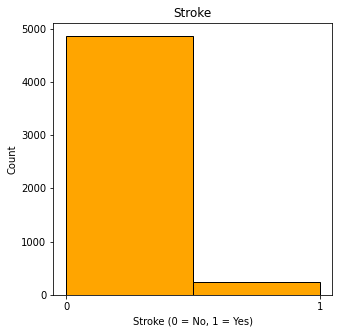

In [11]:
# plotting the distribution of the target variable 'stroke'

plt.figure(figsize=(5, 5))
plt.hist(df_clean['stroke'], bins=2,color='orange', edgecolor='black')
plt.title('Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

+ Due to this imbalanced data deciding what metric to use is important.
+ For this binary classification problem, the Area Under the ROC Curve (AUC) serves as the most reliable evaluation metric, as it accounts for both false positives and false negatives across all classification thresholds. While precision and recall offer valuable insights individually, AUC effectively synthesizes these measures into a single score

+ To ensure our model generalizes well despite the data skew, we’ll employ StratifiedKFold for cross-validation. This method preserves the original class distribution in each fold, preventing bias toward the majority class during training the data and testing

## **univariable Analysis**


#### Defining Categorical and Numerical Data

In [12]:
# separating the categorical and numerical variables
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

numerical = ['age','avg_glucose_level', 'bmi']

In [13]:
# statistical summary of the numerical variables
df_clean[numerical].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.698018
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


Our dataset contains three numerical features, each measured on different scales, requiring careful analysis of their distributions. The comparison between mean and median values reveals distinct skewness patterns across these features:

+ `Age` shows a slight left skew, suggesting a longer tail toward younger ages.

+ `BMI` exhibits a mild right skew, indicating some higher outliers pulling the average upward.

+ `Average Glucose Level` demonstrates a pronounced right skew, revealing many lower values with a few extreme high measurements.

### skewness

In [14]:
# checking for degree of skewness in numerical variables
df_clean[numerical].skew()

age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.076716
dtype: float64

+ Based on the result, age has slight left skew, other two features have right tail, positively skewed shape distribution.

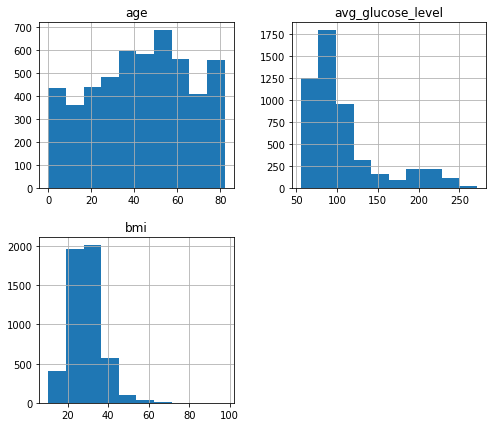

In [15]:
#visualization of the distribution of numerical variables
df_clean[numerical].hist(figsize=(8,7));

+ Both the skewness metrics and histogram visualizations confirm that our numerical features exhibit varying degrees of skewness. The age feature displays a left-skewed distribution, while BMI and average glucose level show right-skewed patterns with differing intensities. 
+ Additionally, these features operate on different measurement scales, which could negatively impact model performance if left unaddressed.

+ To properly handle these challenges during modeling, we will apply standardization using StandardScaler.

#### categorical Data

Univariable analysis

**Gender**

Female    58.59
Male      41.39
Other      0.02
Name: gender, dtype: float64


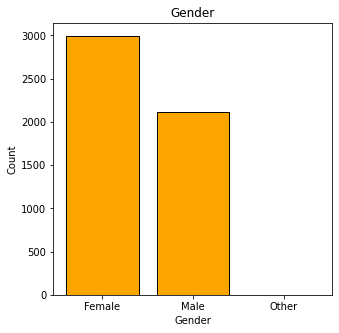

In [16]:
print(f'{round(df["gender"].value_counts(normalize=True)*100,2)}')

plt.figure(figsize=(5, 5))
plt.bar(df['gender'].value_counts().index, df['gender'].value_counts(), color='orange', edgecolor='black')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

We have 2994 female and 2115 male and 1 other gender people.

#### Hypertension

0    90.25
1     9.75
Name: hypertension, dtype: float64


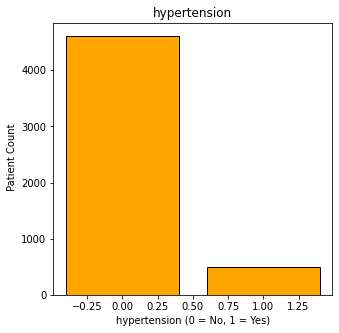

In [17]:
print(f'{round(df["hypertension"].value_counts(normalize=True)*100,2)}')

plt.figure(figsize=(5, 5))
plt.bar(df['hypertension'].value_counts().index, df['hypertension'].value_counts(), color='orange', edgecolor='black')
plt.title('hypertension')
plt.xlabel('hypertension (0 = No, 1 = Yes)')
plt.ylabel(' Patient Count')
plt.show()

 We have 498 patient with hypertension which represents at raound 10 % of the sample.

#### Heart Disease

0    94.6
1     5.4
Name: heart_disease, dtype: float64


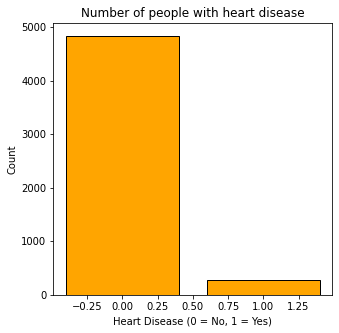

In [18]:
print(f'{round(df["heart_disease"].value_counts(normalize=True)*100,2)}')

plt.figure(figsize=(5, 5))
plt.bar(df['heart_disease'].value_counts().index, df['heart_disease'].value_counts(), color='orange', edgecolor='black')
plt.title('Number of people with heart disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

We have 276 patient with heart disease which is 5.4 % of the sample

#### Married

In [19]:
# number of married and unmarried people
print(df["ever_married"].value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64


3353 people have been married and 1757 people are not married before.

#### Work Type

In [20]:
# percentage of different work types
print(f'{round(df["work_type"].value_counts(normalize=True)*100,2)}')

Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: work_type, dtype: float64


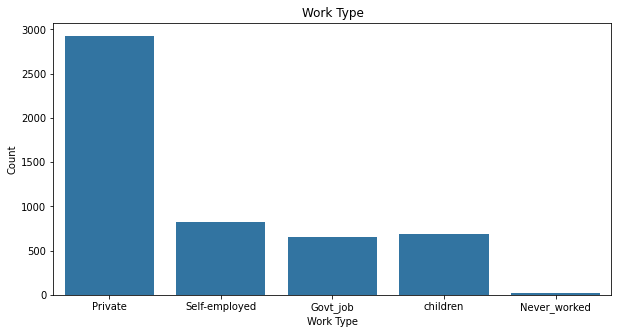

In [21]:
# visualization of the work type
plt.figure(figsize=(10, 5))
sns.countplot(x='work_type', data=df)
plt.title('Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

- 2925 people work in the private sector.
- 819 people are self-employed
- 657 people work at the government job.


#### Smoking


never smoked       37.03
Unknown            30.22
formerly smoked    17.32
smokes             15.44
Name: smoking_status, dtype: float64


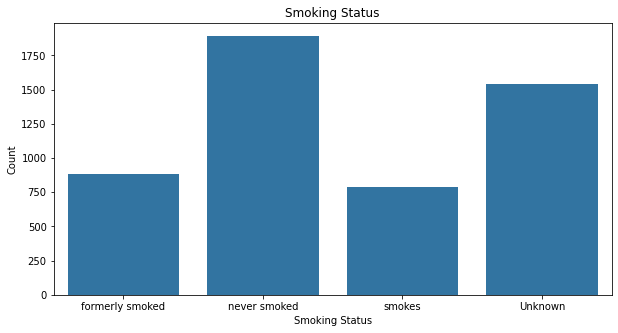

In [22]:
# percentage of the different groups of smoking status
print(f'{round(df["smoking_status"].value_counts(normalize=True)*100,2)}')

# visualization of the smoking status
plt.figure(figsize=(10, 5))
sns.countplot(x='smoking_status', data=df)
plt.title('Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

1892 people have never smoked while 789 people smoke

### **Bivariable Analysis**
This will compare the target variable (stroke ) to the different predictor variables generating bar graphs for each

#### 1) Hypertension and Stoke

A person with hypertension has a probability of 13.25 % get a stroke

A person without hypertension has a probability of  3.97 % get a stroke


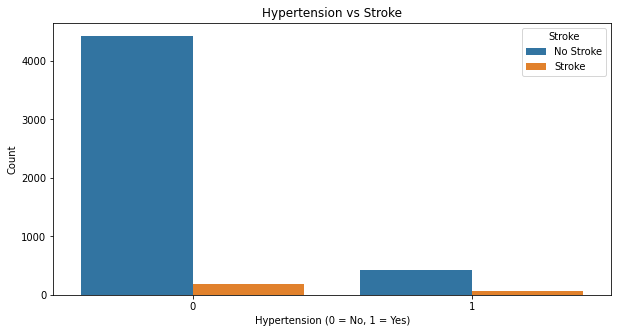

In [23]:
# percentage of patients with stroke and without based on hypertension
print (f'A person with hypertension has a probability of {round(df_clean[df_clean["hypertension"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person without hypertension has a probability of  {round(df_clean[df_clean["hypertension"]==0]["stroke"].mean()*100,2)} % get a stroke')

#visualization of the relationship between hypertension and stroke
plt.figure(figsize=(10, 5))
sns.countplot(x='hypertension', hue='stroke', data=df_clean)
plt.title('Hypertension vs Stroke')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()


 This means a person with hypertension are almost 3.3 time more likely to get stroke than the ones who don't have hypertension

#### 2) Gender and Stroke

A female person has a probability of 4.71 % get a stroke

A male person has a probability of 5.11 % get a stroke



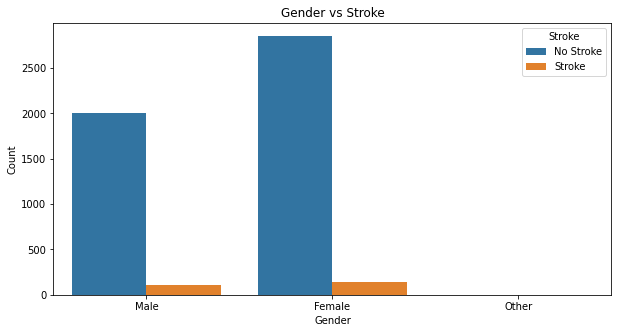

In [24]:
print (f'A female person has a probability of {round(df_clean[df_clean["gender"]=="Female"]["stroke"].mean()*100,2)} % get a stroke')
print()

print (f'A male person has a probability of {round(df_clean[df_clean["gender"]=="Male"]["stroke"].mean()*100,2)} % get a stroke')
print()

# visualization of the relationship between gender and stroke
plt.figure(figsize=(10, 5))
sns.countplot(x='gender',hue='stroke', data=df_clean)
plt.title('Gender vs Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()

From the analysis it looks like men have a highly higher chance of getting a stroke than women

#### 3) Heart Disease and Stroke

A person with heart disease has a probability of 17.03 % to get a stroke

 A person with no heart disease has a probability of4.18 % to get a stroke



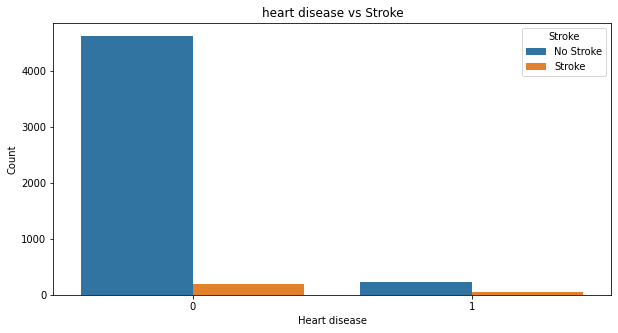

In [25]:
print (f'A person with heart disease has a probability of {round(df_clean[df_clean["heart_disease"]==1]["stroke"].mean()*100,2)} % to get a stroke')
print()

print (f' A person with no heart disease has a probability of{round(df_clean[df_clean["heart_disease"]==0]["stroke"].mean()*100,2)} % to get a stroke')
print()

# visualization of the relationship between Heart disease and stroke
plt.figure(figsize=(10, 5))
sns.countplot(x='heart_disease', hue='stroke', data=df_clean)
plt.title('heart disease vs Stroke')
plt.xlabel('Heart disease')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()

A person with heart disease has almost sn over 5 times chance of getting stroke(17.03%) over a person without (4.18 %)

#### 4) Marriage and Stroke


A person married (or married before) has a probability of 6.56 % get a stroke

A person never married has a probability of 1.65 % get a stroke



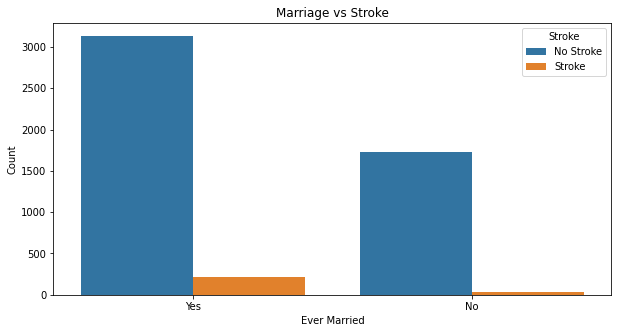

In [26]:
# checking the relationship between marriage and stroke
print (f'A person married (or married before) has a probability of {round(df_clean[df_clean["ever_married"]=="Yes"]["stroke"].mean()*100,2)} % get a stroke')
print()

print (f'A person never married has a probability of {round(df_clean[df_clean["ever_married"]=="No"]["stroke"].mean()*100,2)} % get a stroke')
print()

# visualizations
plt.figure(figsize=(10, 5))
sns.countplot(x='ever_married',hue='stroke', data=df_clean)
plt.title('Marriage vs Stroke')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()


From the graph the risk of aquiring a stroke if married or ever married is 6.56% while the risk in non married people is 1.65%.

this is a 5.7 times difference!

#### 5) Work Type and Stroke


In [27]:
# relationship between the work one does and stroke
print (f'A person with private work type has a probability of {round(df_clean[df_clean["work_type"]=="Private"]["stroke"].mean()*100,2)} % get a stroke')
print()

print (f'Self-employed person has a probability of {round(df_clean[df_clean["work_type"]=="Self-employed"]["stroke"].mean()*100,2)} % get a stroke')
print()

print (f'A person with a goverment job has a probability of {round(df_clean[df_clean["work_type"]=="Govt_job"]["stroke"].mean()*100,2)} % get a stroke')
print()

print (f'A child has a probability of {round(df_clean[df_clean["work_type"]=="children"]["stroke"].mean()*100,2)} % get a stroke')
print()

print (f'A person never worked has a probability of {round(df_clean[df_clean["work_type"]=="Never_worked"]["stroke"].mean()*100,2)} % get a stroke')

A person with private work type has a probability of 5.09 % get a stroke

Self-employed person has a probability of 7.94 % get a stroke

A person with a goverment job has a probability of 5.02 % get a stroke

A child has a probability of 0.29 % get a stroke

A person never worked has a probability of 0.0 % get a stroke


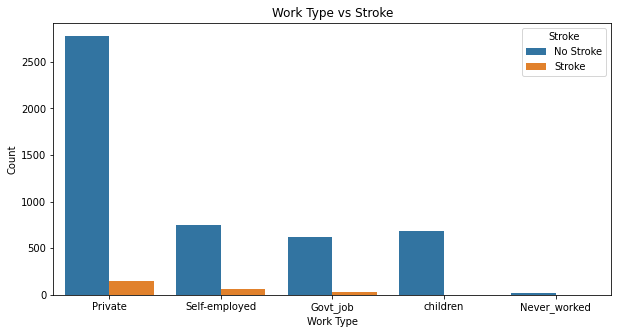

In [28]:
# visualizations
plt.figure(figsize=(10, 5))
sns.countplot(x='work_type', hue='stroke', data=df_clean)
plt.title('Work Type vs Stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()

+ Self-employed individuals face the highest risk at 7.94%, nearly 1.6× higher than private sector (5.09%) and government employees (5.02%), whose risks are remarkably similar.
+ Children show minimal risk (0.29%), while the dataset records 0.0% stroke incidence for those who never worked—though this likely reflects limited sample size.

+ These trends highlight how occupational factors—possibly stress levels, healthcare access, or work environments may influence stroke likelihood, 

#### 6) Smoking and Stroke

A formerly smoked person has a probability of 7.91 % get a stroke

A person never smoked has a probability of 4.76 % get a stroke

A person smokes has a probability of 5.32 % get a stroke

A person whom smoking history is not known,has a probability of 3.04 % get a stroke



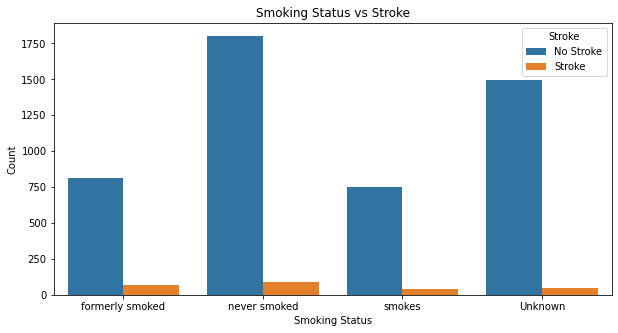

In [29]:
print (f'A formerly smoked person has a probability of {round(df_clean[df_clean["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)} % get a stroke')
print()

print (f'A person never smoked has a probability of {round(df_clean[df_clean["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)} % get a stroke')
print()

print (f'A person smokes has a probability of {round(df_clean[df_clean["smoking_status"]=="smokes"]["stroke"].mean()*100,2)} % get a stroke')
print()

print (f'A person whom smoking history is not known,has a probability of {round(df_clean[df_clean["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)} % get a stroke')
print()

# Visualization of the relationship between smoking status and stroke
plt.figure(figsize=(10, 5))
sns.countplot(x='smoking_status', hue='stroke', data=df_clean)
plt.title('Smoking Status vs Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()

Quitting smoking doesn't immediately reduce stroke risk - former smokers remain the most vulnerable group

Current smoking increases risk by about 12% compared to never-smokers

The unknown group's low rate may suggest missing data rather than actual protection

#### 7) Residence type and Stroke


A person, who lives in urban area, has a probability of 5.2 %  get a stroke

A person, who lives in rural area, has a probability of 4.53 % get a stroke



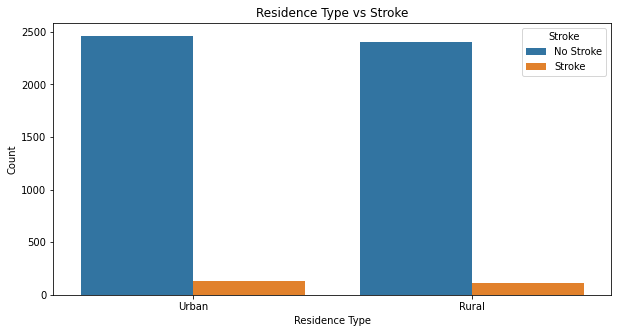

In [30]:
print (f'A person, who lives in urban area, has a probability of {round(df_clean[df_clean["Residence_type"]=="Urban"]["stroke"].mean()*100,2)} %  get a stroke')

print()

print (f'A person, who lives in rural area, has a probability of {round(df_clean[df_clean["Residence_type"]=="Rural"]["stroke"].mean()*100,2)} % get a stroke')
print()

# Visualization of the relationship between Residence type and stroke
plt.figure(figsize=(10, 5))
sns.countplot(x='Residence_type', hue='stroke', data=df_clean)
plt.title('Residence Type vs Stroke')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()

Urban residents have a slightly higher stroke risk (5.2%) than rural residents (4.53%), suggesting environmental or lifestyle factors may play a role

### Does age exhibit a nonlinear relationship with stroke risk

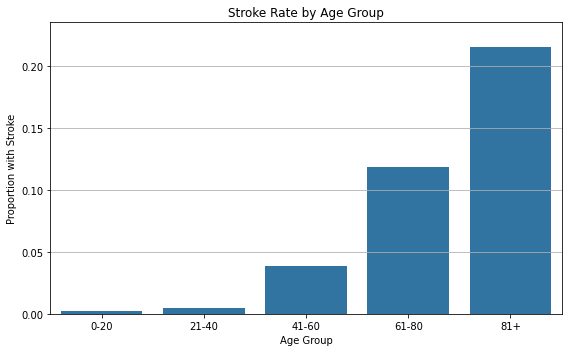

In [31]:
# Create age bins
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']
df_clean['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age bin and calculate stroke rate
stroke_by_age = df_clean.groupby('age_group')['stroke'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=stroke_by_age, x='age_group', y='stroke')
plt.title('Stroke Rate by Age Group')
plt.ylabel('Proportion with Stroke')
plt.xlabel('Age Group')
plt.ylim(0, stroke_by_age['stroke'].max() + 0.02)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

+ Age exhibits a nonlinear relationship with stroke risk.  
+ As shown in the bar chart, the risk of stroke is very low for younger age groups and increases slowly at first. However, after age 60, the risk rises much more sharply, especially for those over 80. This means the increase in stroke risk is not steady or straight—it accelerates as people get older.

In [32]:
# Create new features
df_clean['bmi_category'] = pd.cut(df_clean['bmi'], 
                                bins=[0, 18.5, 25, 30, 100],
                                labels=['underweight', 'normal', 'overweight', 'obese'])

df_clean['glucose_category'] = pd.cut(df_clean['avg_glucose_level'],
                                    bins=[0, 70, 99, 125, 200, 300],
                                    labels=['low', 'normal', 'prediabetes', 'diabetes', 'severe'])

df_clean['age_group'] = pd.cut(df_clean['age'],
                             bins=[0, 30, 45, 60, 100],
                             labels=['young', 'middle', 'senior', 'elderly'])

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


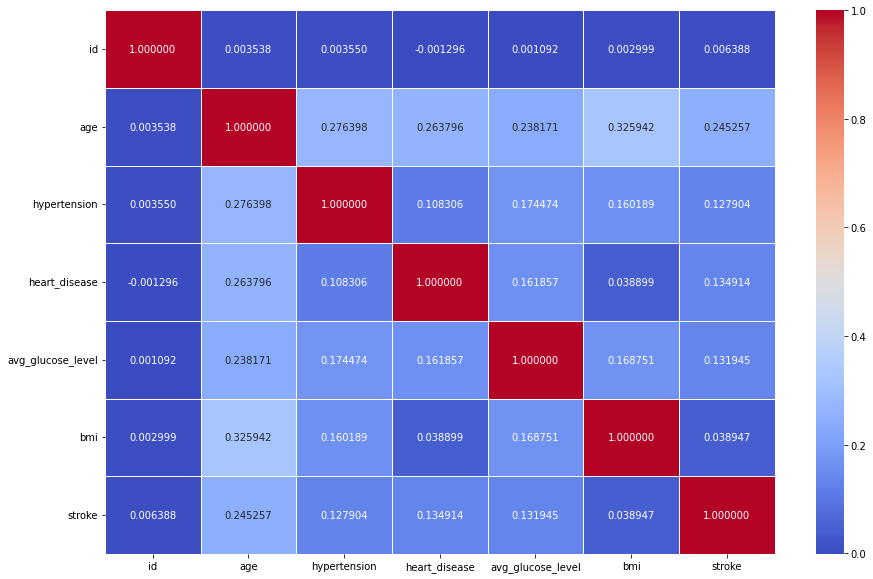

In [33]:
# plotting a correlation matrix
correlation_matrix=df_clean.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",linewidths=0.5,fmt='2f')
correlation_matrix

In [129]:
y. value_counts()




0    4860
1     249
Name: stroke, dtype: int64

# Data Pre-processing


Before any pre- processing is done A new copy of the `df_clean` is created calling it `df_process` to prevent messing up with the original and enabling going back to it incase a problem arises

In [34]:
df_process = df_clean.copy()

#### Encodeing Binary and Categorical columns for modelling use

In [35]:
# converting 'age' to numeric and handling '81+' case
df_process['age'] = df_process['age'].astype(str).str.strip().replace('81+', 81).astype(float)

# Manual binary encoding for applicable binary categorical variables
binary_mappings = {
    'ever_married': {'No': 0, 'Yes': 1},
    'Residence_type': {'Rural': 0, 'Urban': 1},
    'gender': {'Male': 0, 'Female': 1}
}

for col, mapping in binary_mappings.items():
    df_process[col] = df_process [col].map(mapping)

# Filter out rare categories (e.g., 'Other' gender)
df_process = df_process[df_process['gender'].isin([0, 1])]


In [36]:
print(df_process.dtypes)

id                      int64
gender                float64
age                   float64
hypertension            int64
heart_disease           int64
ever_married            int64
work_type              object
Residence_type          int64
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
age_group            category
bmi_category         category
glucose_category     category
dtype: object


In [37]:
# Save preprocessed data
df_process.to_csv("healthcare-dataset-stroke-data-processed.csv", index=False)

### **defining features and the target**

In [38]:
X = df_process.drop(columns=['stroke','id'])
y = df_process['stroke']

### **Train-Test Split**

The data is split into 2 categories: Training data and Test data. The training set is used to train the model, while the testing set is reserved to evaluate how well the model generalizes to unseen data.

We split the data into 80 training and 20 for testing the model

the split is stratified to preserve class imbalance

In [39]:
X = df_process.drop(['stroke', 'id'], axis=1)  # drop ID and target
y = df_process['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


### **categorizing and one hot encoding columns**

In [40]:
# Define numeric and categorical features
numeric_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                       'work_type', 'Residence_type', 'smoking_status',
                       'bmi_category', 'glucose_category', 'age_group']

In [41]:
# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [42]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

encoded_cat_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(encoded_cat_names)

# Turn it into a DataFrame for readability (optional)
X_train_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_test_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

The `ColumnTransformer` in scikit-learn is a very useful tool that lets you apply different preprocessing steps to different columns of your dataset

### **Applying SMOTE**

SMOTE stands for Synthetic Minority Over-sampling Technique. It’s a technique used in machine learning to fix class imbalance in a dataset by creating synthetic (fake) samples of the minority class.

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(
    preprocessor.fit_transform(X_train), y_train)


# Modelling

### Baseline logistic regression model

We use the baseline model as an inferential tool to assess the overall significance of the model, as well as the statistical significance and impact of individual features.



In [58]:
# Preprocess and apply SMOTE
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_train_res, y_train_res = smote.fit_resample(X_train_preprocessed, y_train)

# Train on resampled data
logreg_model = LogisticRegression(max_iter=200, class_weight='balanced')
logreg_model.fit(X_train_res, y_train_res)


LogisticRegression(class_weight='balanced', max_iter=200)

In [61]:

def evaluate_model(model, X, y_true):
	y_pred = model.predict(X)
	print("Confusion Matrix:")
	print(confusion_matrix(y_true, y_pred))
	print("\nClassification Report:")
	print(classification_report(y_true, y_pred))
	print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")

# Apply the same preprocessing to the test set
X_test_preprocessed = preprocessor.transform(X_test)

# Evaluate
evaluate_model(logreg_model, X_test_preprocessed, y_test)


Confusion Matrix:
[[684 288]
 [ 10  40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       972
           1       0.12      0.80      0.21        50

    accuracy                           0.71      1022
   macro avg       0.55      0.75      0.52      1022
weighted avg       0.94      0.71      0.79      1022

Accuracy: 0.7084


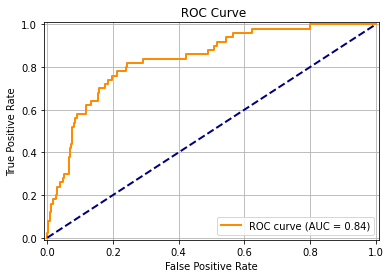

In [63]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The results from our logistic regression model, trained with SMOTE to address class imbalance, show a notable trade-off between correctly identifying stroke cases and overall prediction accuracy. The model achieves an overall accuracy of 70.84%, but more importantly, it demonstrates a recall of 80% for the minority class (stroke cases), meaning it correctly identifies 8 out of 10 actual stroke cases.

The confusion matrix shows that out of 972 non-stroke cases, 288 were misclassified as strokes, while only 10 out of 50 actual stroke cases were missed. This outcome reflects a model that prioritizes sensitivity (recall) over specificity, which is typically desirable in healthcare contexts where missing a positive case (stroke) can have serious consequences.

We are using this model as our baseline because it provides a reliable starting point that effectively addresses the class imbalance problem using SMOTE and captures most stroke cases. Although it sacrifices precision, its strong recall makes it suitable for comparison with more advanced models

## Finding the best performing model


+ In our analysis, we are focused on identifying the best-performing classification model for predicting stroke occurrences. We began by establishing a baseline using logistic regression with SMOTE to handle class imbalance. While this model gave us a starting point, our goal is to improve performance, especially on the minority class (stroke = 1), where recall and precision are critical. 

+ To achieve this we are training more advanced models like Random Forest to improve performance, especially recall on the minority class. We’ll compare models using metrics like precision, recall, F1-score, and ROC AUC to choose the most effective one

### RandomForestClassifier

In [64]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [65]:

y_pred = rf_model.predict(X_test_preprocessed)
y_proba = rf_model.predict_proba(X_test_preprocessed)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.20      0.06      0.09        50

    accuracy                           0.94      1022
   macro avg       0.58      0.52      0.53      1022
weighted avg       0.92      0.94      0.93      1022


Confusion Matrix:
 [[960  12]
 [ 47   3]]

ROC AUC Score: 0.7551131687242798


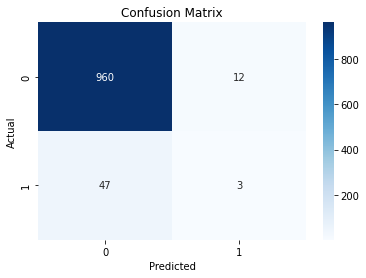

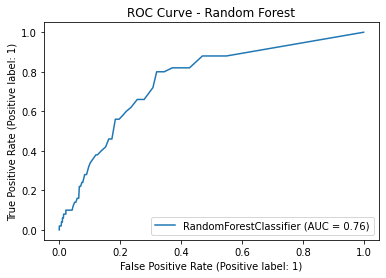

In [69]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test_preprocessed, y_test)
plt.title('ROC Curve - Random Forest')
plt.show()


+ The current Random Forest model, even after applying SMOTE to balance the training data, shows high accuracy (94%) but performs poorly in identifying stroke cases (class 1), with a recall of only 6%. This is largely due to class imbalance in the test set and the default classification threshold of 0.5, which tends to favor the majority class.

+ Adjusting the classification threshold can help strike a better balance between precision and recall, allowing the model to identify more stroke cases

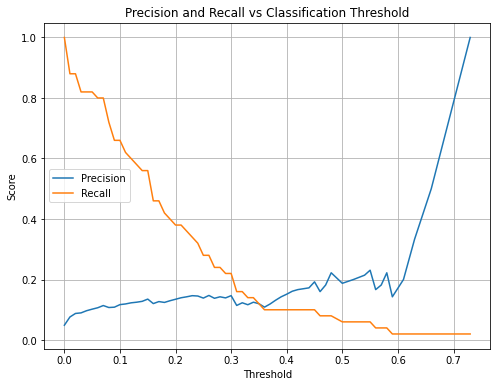

In [73]:
# Get predicted probabilities for the positive class (stroke = 1)
from sklearn.metrics import precision_recall_curve


y_probs = rf_model.predict_proba(preprocessor.transform(X_test))[:, 1]

# Plot Precision-Recall vs Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Classification Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [74]:
custom_threshold = 0.3
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       972
           1       0.15      0.22      0.18        50

    accuracy                           0.90      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.92      0.90      0.91      1022

Confusion Matrix:
 [[908  64]
 [ 39  11]]
ROC AUC Score: 0.7551131687242798


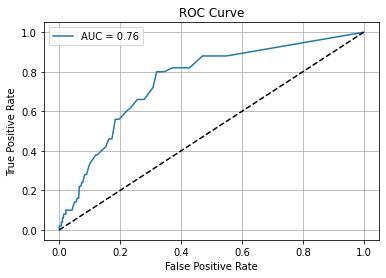

In [75]:
# Predict probabilities
y_probs = model.predict_proba(X_test_preprocessed)[:,1]

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


+ After adjusting the classification threshold, we observed an increase in recall for the minority class (stroke = 1), rising from 6% to 22%. Although this came at the cost of some precision and overall accuracy, it allowed the model to identify more true stroke cases, which is critical in medical applications where missing a positive case can have serious consequences. 

### XGBoost


In [77]:
from sklearn.metrics import roc_auc_score


gb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
gb_model.fit(X_train_res, y_train_res)

# Predict
y_pred = gb_model.predict(X_test_preprocessed)
y_probs = gb_model.predict_proba(X_test_preprocessed)[:, 1]

# Metrics
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
fpr, tpr, _ = roc_curve(y_test, y_probs)
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Print report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", cm)
print(f"\nROC AUC Score: {roc_auc:.4f}")

[13:44:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.23      0.10      0.14        50

    accuracy                           0.94      1022
   macro avg       0.59      0.54      0.55      1022
weighted avg       0.92      0.94      0.93      1022


Confusion Matrix:
 [[955  17]
 [ 45   5]]

ROC AUC Score: 0.7706


+ The XGBoost model achieved a high overall accuracy of 94%, driven largely by its strong performance on the majority class (non-stroke cases). It had a precision of 0.23 and recall of 0.10 for the minority class (stroke), indicating that it still struggles to correctly identify true stroke cases despite SMOTE balancing. The ROC AUC score of 0.77 suggests moderate discriminatory ability.

+ Further improvements like threshold tuning, cross-validation, or feature selection are needed to enhance minority class detection.

In [82]:
#Predict probabilities and tune threshold
y_probs = gb_model.predict_proba(X_test_preprocessed)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
best_thresh_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_thresh_idx]

#Predict with best threshold
y_pred_thresh = (y_probs >= best_thresh).astype(int)


print("Classification Report:\n", classification_report(y_test, y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))
print("Best Threshold:", best_thresh)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train_res, y_train_res)

print("Best Hyperparameters:", grid_search.best_params_)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88       972
           1       0.14      0.60      0.22        50

    accuracy                           0.79      1022
   macro avg       0.56      0.70      0.55      1022
weighted avg       0.93      0.79      0.85      1022

Confusion Matrix:
 [[782 190]
 [ 20  30]]
ROC AUC Score: 0.7705555555555555
Best Threshold: 0.03274241
[13:57:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


The tuned XGBoost model shows significantly improved recall for the minority class (1), increasing from very low values to 0.60, meaning it can now correctly identify 60% of the actual positive cases.

However, this comes at the cost of reduced precision (0.14) and overall accuracy (0.79), because more false positives are predicted.

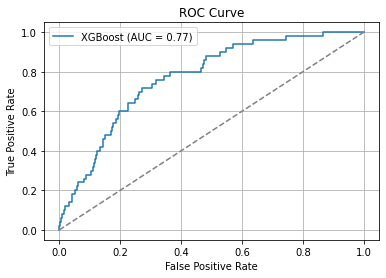

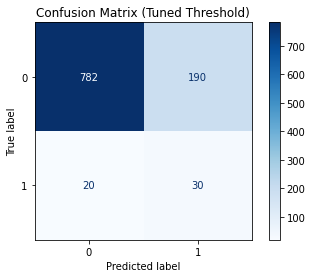

In [84]:

plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_thresh, cmap='Blues')
plt.title("Confusion Matrix (Tuned Threshold)")
plt.show()

<ipython-input-87-88ac19b33944>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


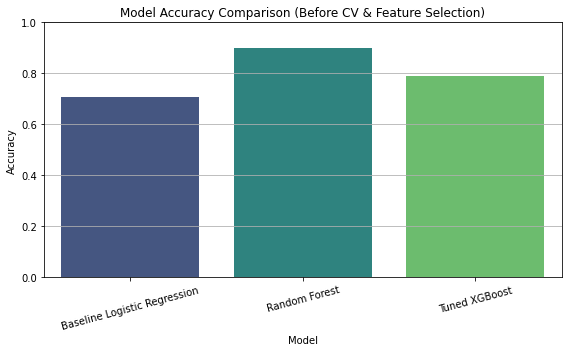

In [ ]:


#Accuracy scores from previous results
model_names = ["Baseline Logistic Regression", "Random Forest", "Tuned XGBoost"]
accuracies = [0.7084, 0.90, 0.79] 

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison (Before CV & Feature Selection)")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show();


### Applying cross validation and Feature selection

#### Applying on XGboost

In [88]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=20)  # you can tune k
X_train_selected = selector.fit_transform(X_train_preprocessed, y_train)
X_test_selected = selector.transform(X_test_preprocessed)


In [105]:
xgb = XGBClassifier(eval_metric='logloss')
cv_scores = cross_val_score(xgb, X_train_selected, y_train, cv=5, scoring='accuracy')

print("Cross-Validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

#Train and evaluate after CV
xgb.fit(X_train_selected, y_train)
y_pred = xgb.predict(X_test_selected)


Cross-Validated Accuracy Scores: [0.95110024 0.94254279 0.94369645 0.93635251 0.94002448]
Mean Accuracy: 0.9427432942394651


In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Define the XGBoost model
xgb = XGBClassifier (eval_metric='logloss',
                    learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8)

# Custom scorers targeting class 1
precision_scorer = make_scorer(precision_score, pos_label=1)
recall_scorer = make_scorer(recall_score, pos_label=1)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Evaluate each metric
for scorer, name in zip([precision_scorer, recall_scorer, f1_scorer], 
                        ['Precision', 'Recall', 'F1 Score']):
    scores = cross_val_score(xgb, X_train_res, y_train_res, cv=5, scoring=scorer)
    print(f"Cross-Validated {name} Scores:", scores)
    print(f"Mean {name}: {scores.mean():.4f}")
    print("-" * 50)


Cross-Validated Precision Scores: [1.         0.97982346 0.97735849 0.98600509 0.98232323]
Mean Precision: 0.9851
--------------------------------------------------
Cross-Validated Recall Scores: [0.75835476 1.         1.         0.99614396 1.        ]
Mean Recall: 0.9509
--------------------------------------------------
Cross-Validated F1 Score Scores: [0.8625731  0.98980892 0.98854962 0.99104859 0.9910828 ]
Mean F1 Score: 0.9646
--------------------------------------------------


+ Following threshold tuning and hyperparameter optimization, we cross-validated the XGBoost model to assess its robustness on the minority class (class 1).
+ The model achieved a mean precision of **0.9851**, mean recall of **0.9509**, and a mean F1-score of **0.9646** across 5 folds. These metrics indicate that the model is highly effective at both detecting and correctly predicting the minority class

#### Applying on RandomForestClassifier & Logistic regression

In [110]:
logreg = LogisticRegression(max_iter=200, class_weight='balanced')
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

In [ ]:
models = {'Logistic Regression': logreg, 'Random Forest': rf}
# Custom scorers
precision_scorer = make_scorer(precision_score, pos_label=1)
recall_scorer = make_scorer(recall_score, pos_label=1)
f1_scorer = make_scorer(f1_score, pos_label=1)

#Storing the scores
scores_dict = {model_name: {} for model_name in models}

#cross-validation
for name, model in models.items():
    for scorer, metric_name in zip([precision_scorer, recall_scorer, f1_scorer], 
                                   ['Precision', 'Recall', 'F1']):
        scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring=scorer)
        scores_dict[name][metric_name] = scores.mean()
        print(f"{name} - {metric_name}: {scores.mean():.4f}")

Logistic Regression - Precision: 0.7524
Logistic Regression - Recall: 0.8907
Logistic Regression - F1: 0.8156
Random Forest - Precision: 0.9805
Random Forest - Recall: 0.9699
Random Forest - F1: 0.9740


+ Logistic Regression achieved a recall of **0.8907**, indicating its strength in identifying the minority class, but its precision was lower at **0.7524**, leading to more false positives. This trade-off resulted in a respectable F1 score of 0.8156.
+ Random Forest demonstrated both high precision **0.9805** and recall **0.9699**, achieving a robust F1 score of 0.9740



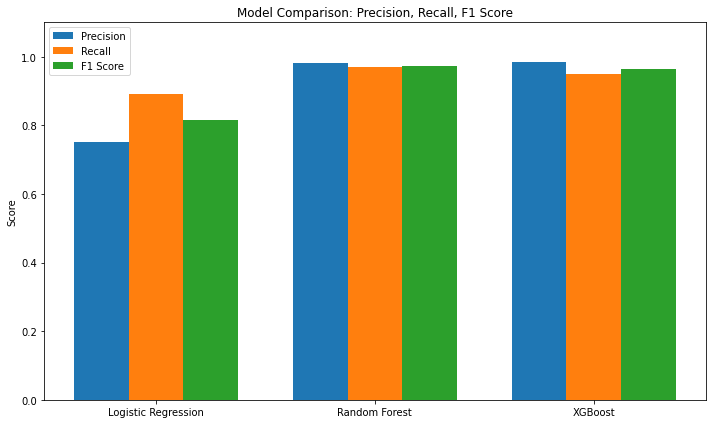

In [116]:
# visualization of the 3 models scores
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
precision_scores = [0.7524, 0.9805, 0.9851]
recall_scores = [0.8907, 0.9699, 0.9509]
f1_scores = [0.8156, 0.9740, 0.9646]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, precision_scores, width, label='Precision')
bars2 = ax.bar(x, recall_scores, width, label='Recall')
bars3 = ax.bar(x + width, f1_scores, width, label='F1 Score')

ax.set_ylabel('Score')
ax.set_title('Model Comparison: Precision, Recall, F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)
ax.legend()


plt.tight_layout()
plt.show()

## Selecting the final model


* Based on the metrics, Random Forest stands out with the most balanced performance—extremely high precision and recall—making it the top candidate for deployment.
+ However, XGBoost is a very close contender and might be preferred in some environments for its flexibility and additional tuning options

#### comparing base logistic regression to a tuned one

* Based on the metrics, Random Forest stands out with the most balanced performance—extremely high precision and recall—making it the top candidate for deployment.
+ However, XGBoost is a very close contender and might be preferred in some environments for its flexibility and additional tuning options

In [153]:
# Define pipeline using imblearn
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(max_iter=200, class_weight='balanced', solver='liblinear'))
])


param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2']
}

# Scoring
scoring = {
    'Precision': make_scorer(precision_score, pos_label=1),
    'Recall': make_scorer(recall_score, pos_label=1),
    'F1': make_scorer(f1_score, pos_label=1)
}

# GridSearchCV with cross-validation
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit='F1',  # Optimize based on F1
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_preprocessed, y_train)

# Evaluate the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_preprocessed)

print(" Best Parameters:", grid.best_params_)
print(f"Best F1 Score (CV): {grid.best_score_:.4f}")
print("Evaluation on Test Set:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


 Best Parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l1'}
Best F1 Score (CV): 0.2253
Evaluation on Test Set:
[[676 296]
 [  8  42]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       972
           1       0.12      0.84      0.22        50

    accuracy                           0.70      1022
   macro avg       0.56      0.77      0.52      1022
weighted avg       0.95      0.70      0.79      1022

Accuracy: 0.7025


+ The tuned logistic regression model, optimized with SMOTE, cross-validation, and GridSearchCV (C=0.01, L1 penalty), showed a significant improvement in identifying stroke cases. 
+ While overall accuracy was 70.25%, the model achieved a high recall of 0.84 for stroke predictions—crucial for medical use cases despite a low precision of 0.12
+ The F1-score for stroke rose to 0.22, aligning with cross-validated result.

+ Compared to the baseline, this model better detects true stroke cases, confirming that tuning and class balancing improved minority class performance.

#### checking for overfitting

In [158]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Training Set Evaluation")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Evaluate on test set
print(" Test Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Training Set Evaluation
Accuracy: 0.9334475165157817
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3888
           1       0.41      0.81      0.54       199

    accuracy                           0.93      4087
   macro avg       0.70      0.88      0.75      4087
weighted avg       0.96      0.93      0.94      4087

 Test Set Evaluation
Accuracy: 0.8874755381604696
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.16      0.30      0.21        50

    accuracy                           0.89      1022
   macro avg       0.56      0.61      0.57      1022
weighted avg       0.92      0.89      0.90      1022



+ The model performs strongly on training data, detecting 81% of stroke cases, but its performance drops on test data, identifying only 30%. This gap suggests overfitting — the model learned training patterns too well and struggles to generalize to new, unseen data.


### Business recommendations

1) Enable Early Risk Screening
Deploy the high-recall model in clinical settings to flag individuals at high risk of stroke for early intervention.

2) Integrate into Health Systems
Incorporate the model into digital health tools or insurance platforms to assess and manage stroke risk in routine assessments.

3) Use as a Pre-Screening Tool
Due to low precision, use the model to pre-screen patients—follow up with clinical validation before acting on predictions.

4) Enhance Data Quality
Improve model performance by collecting additional features like lifestyle habits, family history, and detailed clinical metrics.

### Limitation of our analysis

1) Imbalanced Dataset
Despite using SMOTE to address class imbalance, the original dataset had very few stroke cases, which may still bias model performance and generalizability.

2) Low Precision for Stroke Cases
The tuned models achieved high recall but very low precision for stroke prediction, indicating a high rate of false positives and limited clinical usability without further validation.

3) Limited Feature Set
The dataset lacked important medical and behavioral variables such as smoking duration, exercise frequency, diet, or family history, which are known stroke risk factors.

4) Model Interpretability Trade-offs
While Logistic Regression is interpretable, tuning with L1 regularization and threshold adjustments complicates interpretation and decision-making without medical domain knowledge.

